In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Sig_Eqs = pd.read_csv("earthquakes-data.tsv", sep='\t')

print("数据集中的所有列名：")
for col in Sig_Eqs.columns:
    print(f"- {col}")

print("\n数据前5行预览：")
print(Sig_Eqs.head())

数据集中的所有列名：
- Search Parameters
- Id
- Year
- Mo
- Dy
- Hr
- Mn
- Sec
- Tsu
- Vol
- Country
- Area
- Region
- Location Name
- Latitude
- Longitude
- Focal Depth (km)
- Mag
- Mw
- Ms
- Mb
- Ml
- Mfa
- Unk
- MMI Int
- Deaths
- Death Description
- Missing
- Missing Description
- Injuries
- Injuries Description
- Damage ($Mil)
- Damage Description
- Houses Destroyed
- Houses Destroyed Description
- Houses Damaged
- Houses Damaged Description
- Total Deaths
- Total Death Description
- Total Missing
- Total Missing Description
- Total Injuries
- Total Injuries Description
- Total Damage ($Mil)
- Total Damage Description
- Total Houses Destroyed
- Total Houses Destroyed Description
- Total Houses Damaged
- Total Houses Damaged Description

数据前5行预览：
  Search Parameters      Id    Year  Mo  Dy  Hr  Mn  Sec  Tsu     Vol  ...  \
0                []     NaN     NaN NaN NaN NaN NaN  NaN  NaN     NaN  ...   
1               NaN     1.0 -2150.0 NaN NaN NaN NaN  NaN  NaN     NaN  ...   
2              

In [2]:
# 任务1.1：计算每个国家的总死亡人数并取前10名
# 1. 处理缺失值：死亡人数为空的按0处理
Sig_Eqs['Deaths'] = Sig_Eqs['Deaths'].fillna(0)
# 2. 按国家分组，计算死亡总数
country_death_counts = Sig_Eqs.groupby('Country')['Deaths'].sum().reset_index()
# 3. 按死亡总数降序排序，取前10名
top10_countries = country_death_counts.sort_values(by='Deaths', ascending=False).head(10)
# 4. 显示结果
print("=== 任务1.1：地震死亡总数前10的国家 ===")
print(top10_countries)

=== 任务1.1：地震死亡总数前10的国家 ===
        Country     Deaths
28        CHINA  2139210.0
142      TURKEY  1199742.0
65         IRAN  1014453.0
69        ITALY   498219.0
132       SYRIA   419226.0
58        HAITI   323484.0
10   AZERBAIJAN   319251.0
71        JAPAN   242445.0
6       ARMENIA   191890.0
103    PAKISTAN   145083.0


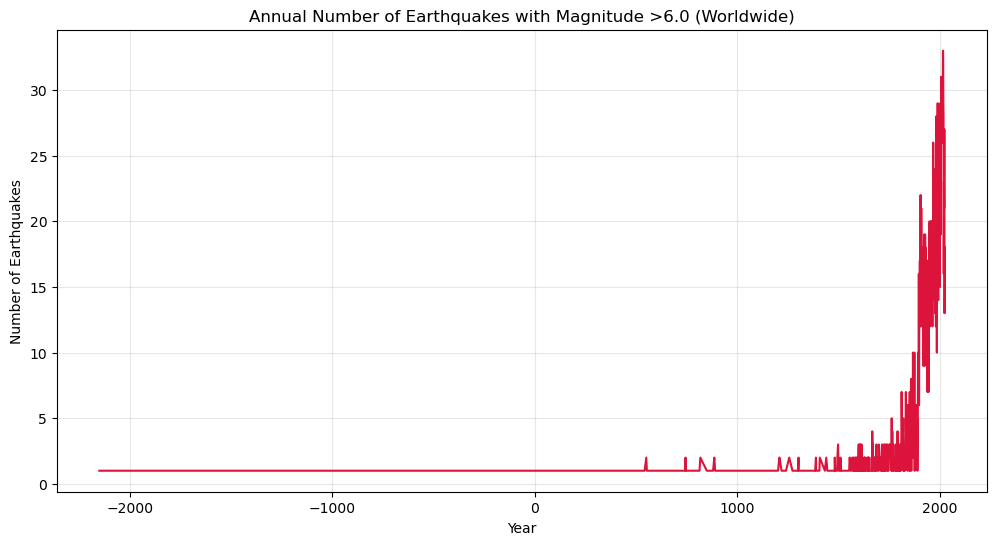


=== 任务1.2：趋势分析 ===
观察结果：从图中可以看到，1900年之后震级>6.0的地震记录数量明显增加。
原因解释：这并非实际地震数量增加，主要是由于近现代地震监测技术进步，
早期数据因记录不完善导致数量偏低，而现代能更全面地记录地震事件。


In [3]:
# 任务1.2：每年全球震级>6.0的地震总数及时间序列

# 1. 筛选震级>6.0的地震,排除震级为0的行
filtered_quakes = Sig_Eqs[(Sig_Eqs['Mag'] > 6.0) & (Sig_Eqs['Mag'].notna())]

# 2. 按年份分组，统计每年的地震数量
yearly_counts = filtered_quakes.groupby('Year').size().reset_index(name='Quake_Count')

# 3. 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Quake_Count'], color='crimson')
plt.title('Annual Number of Earthquakes with Magnitude >6.0 (Worldwide)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(alpha=0.3)  
plt.show()

# 4. 趋势分析
print("\n=== 任务1.2：趋势分析 ===")
print("观察结果：从图中可以看到，1900年之后震级>6.0的地震记录数量明显增加。")
print("原因解释：这并非实际地震数量增加，主要是由于近现代地震监测技术进步，")
print("早期数据因记录不完善导致数量偏低，而现代能更全面地记录地震事件。")

In [4]:
# 任务1.3：统计各国地震总数及最大地震日期

def CountEq_LargestEq(country_name):
    # 1. 筛选该国家的所有地震
    country_quakes = Sig_Eqs[Sig_Eqs['Country'] == country_name].copy()
    
    # 2. 计算地震总数
    total_quakes = len(country_quakes)
    
    # 3. 处理无地震记录的情况
    if total_quakes == 0:
        return (0, "无地震记录")
    
    # 4. 找到该国家震级最大的地震，排除震级为空的行
    valid_quakes = country_quakes[country_quakes['Mag'].notna()]
    if valid_quakes.empty:
        return (total_quakes, "无有效震级记录")
    
    largest_quake = valid_quakes.loc[valid_quakes['Mag'].idxmax()]
    
    # 5. 组合日期，处理缺失的月/日
    year = int(largest_quake['Year']) if pd.notna(largest_quake['Year']) else '未知'
    month = int(largest_quake['Mo']) if pd.notna(largest_quake['Mo']) else '未知'
    day = int(largest_quake['Dy']) if pd.notna(largest_quake['Dy']) else '未知'
    largest_date = f"{year}年{month}月{day}日"
    
    return (total_quakes, largest_date)

# 6. 应用函数到所有国家
all_countries = Sig_Eqs['Country'].unique()  
results = []

for country in all_countries:
    total, date = CountEq_LargestEq(country)
    results.append({
        'Country': country,
        'Total_Quakes': total,
        'Largest_Quake_Date': date
    })

# 7. 转换为DataFrame并按地震总数降序排序
results_df = pd.DataFrame(results)
sorted_results = results_df.sort_values(by='Total_Quakes', ascending=False)

# 8. 显示结果
print("\n=== 任务1.3：各国地震统计（按总数降序） ===")
print(sorted_results)


=== 任务1.3：各国地震统计（按总数降序） ===
        Country  Total_Quakes Largest_Quake_Date
15        CHINA           623         1668年7月25日
34        JAPAN           424         2011年3月11日
73    INDONESIA           421        2004年12月26日
8          IRAN           388         856年12月22日
10       TURKEY           358        1939年12月26日
..          ...           ...                ...
151     BURUNDI             1         2004年2月24日
157      ZAMBIA             1         2017年2月24日
156  MADAGASCAR             1         2017年1月11日
158     COMOROS             1         2018年5月15日
0           NaN             0              无地震记录

[159 rows x 3 columns]


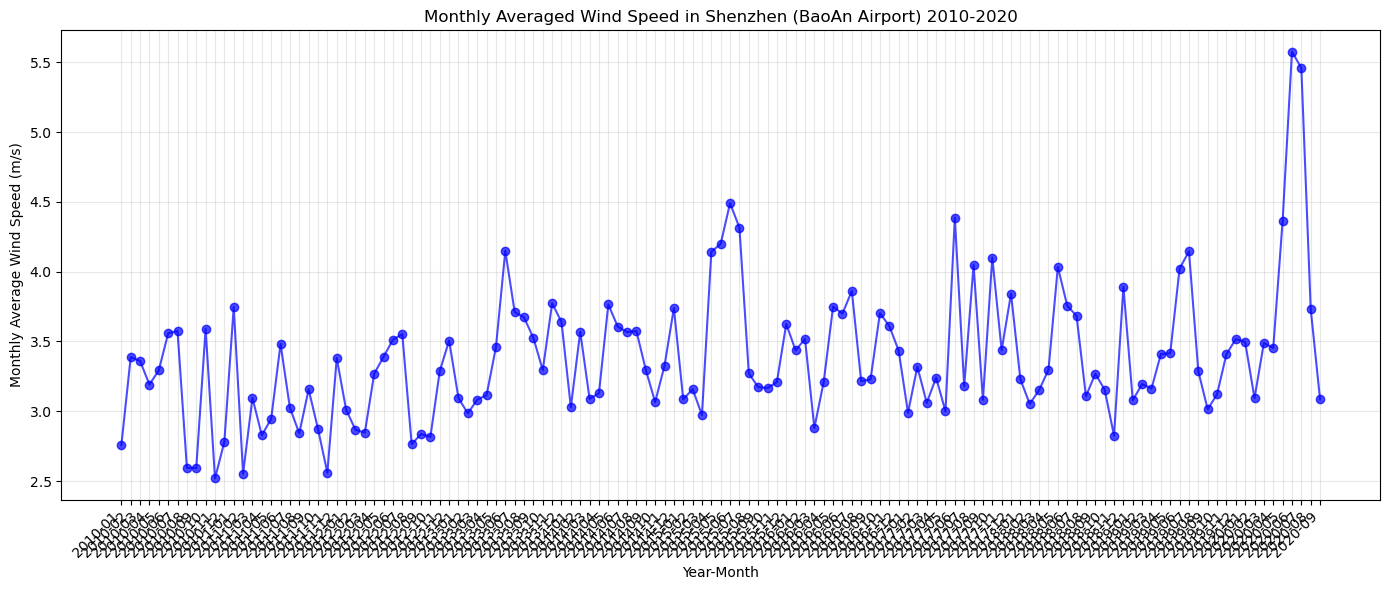

In [5]:
#任务2
import pandas as pd
import matplotlib.pyplot as plt

# 1：读取数据
# 忽略混合类型警告
df = pd.read_csv('2281305.csv', low_memory=False)

# 2：正确解析WND字段（逗号分隔格式）
# WND字段格式示例："040,1,N,0020,1"，各部分含义：
# [风向角度, 风向质量码, 风类型码, 风速原始值, 风速质量码]
# 拆分WND为列表，提取各部分
wnd_parts = df['WND'].str.split(',', expand=True)  # 按逗号拆分，生成新列

# 提取风速原始值，转换为数值
df['wind_speed_raw'] = pd.to_numeric(wnd_parts[3], errors='coerce')
# 计算实际风速
df['wind_speed'] = df['wind_speed_raw'] / 10

# 提取风速质量码
df['speed_quality'] = wnd_parts[4]
# 提取风类型码
df['type_code'] = wnd_parts[2]

# 3：过滤无效数据 
# 过滤条件：
# 1. 风速原始值不是缺失值（9999）
# 2. 风速质量码为合格（0/1/4/5/9，参考POS 70说明）
# 3. 风类型码不是缺失值（9，参考POS 65说明）
filter_mask = (df['wind_speed_raw'] != 9999) & \
              (df['speed_quality'].isin(['0', '1', '4', '5', '9'])) & \
              (df['type_code'] != '9')
filtered_df = df[filter_mask].copy()  # 用copy()避免对原始数据进行修改

# 4：处理时间
# 转换DATE为datetime格式
filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'], errors='coerce')
# 剔除时间转换失败的行
filtered_df = filtered_df.dropna(subset=['DATE'])

# 提取“年月”用于分组
filtered_df['year_month'] = filtered_df['DATE'].dt.strftime('%Y-%m')

# 5：计算月平均风速 
# 按年月分组，计算平均风速
monthly_avg_wind = filtered_df.groupby('year_month')['wind_speed'].mean().reset_index()
# 按时间排序
monthly_avg_wind = monthly_avg_wind.sort_values('year_month')

# 6：绘制趋势图 
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg_wind['year_month'], 
         monthly_avg_wind['wind_speed'], 
         marker='o', linestyle='-', color='blue', alpha=0.7)


plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Monthly Average Wind Speed (m/s)', fontsize=10)
plt.title('Monthly Averaged Wind Speed in Shenzhen (BaoAn Airport) 2010-2020', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(alpha=0.3)  
plt.tight_layout()  
plt.show()

In [6]:
#任务3
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#3.1 加载并清洗数据
excel_file = pd.ExcelFile(r'C:\Users\Morchaim&Hwachi\open access ecotoxicology research dataset1.xlsx')
df = excel_file.parse('open access ecotoxicology resea')

# 处理“Cited by”列：转换为数值类型，无法转换的设为 NaN
df['Cited by'] = pd.to_numeric(df['Cited by'], errors='coerce')

# 删除“Cited by”和“Year”列的缺失值（保证时间序列完整性）
df_clean = df.dropna(subset=['Cited by', 'Year']).copy()  

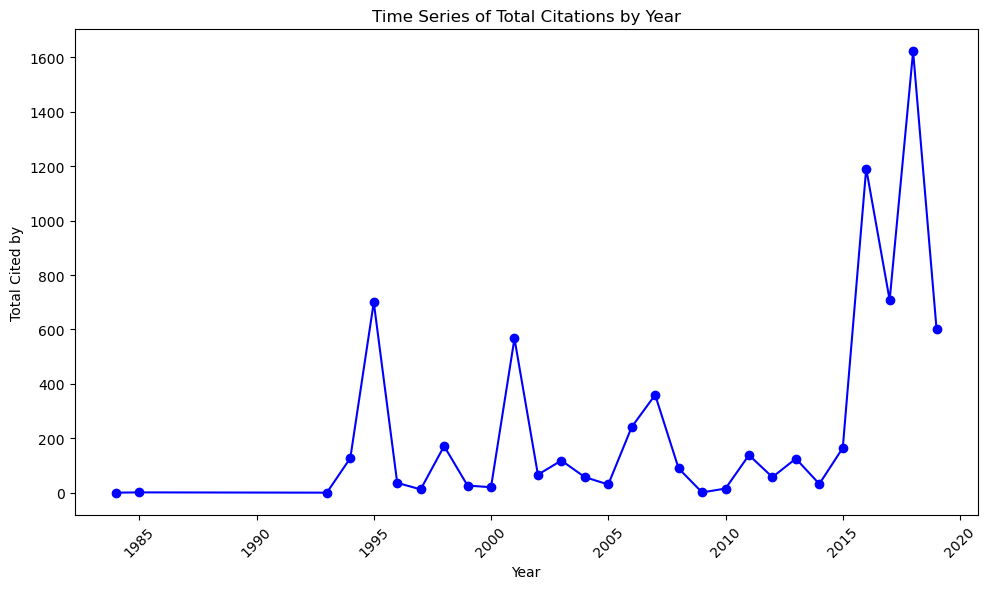

In [7]:
#3.2 绘制时间序列图
time_series = df_clean.groupby('Year')['Cited by'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(time_series['Year'], time_series['Cited by'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Cited by')
plt.title('Time Series of Total Citations by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
#3.3 进行至少5种统计检验
cited_by = df_clean['Cited by']
# 1. 描述性统计
desc_stats = cited_by.describe()
print("===== 统计检验 1：描述性统计 =====\n", desc_stats)

# 2. 正态性检验
shapiro_stat, shapiro_p = stats.shapiro(cited_by)
print(f"\n===== 统计检验 2：Shapiro-Wilk正态性检验 =====\n统计量 = {shapiro_stat:.4f}, p值 = {shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("  结论：数据**不服从**正态分布（p < 0.05）")
else:
    print("  结论：数据**服从**正态分布（p ≥ 0.05）")

# 3. 独立样本t检验（2018 vs 2019）
year_2018 = df_clean[df_clean['Year'] == '2018']['Cited by']
year_2019 = df_clean[df_clean['Year'] == '2019']['Cited by']
if len(year_2018) > 0 and len(year_2019) > 0:
    t_stat, t_p = stats.ttest_ind(year_2018, year_2019, equal_var=False, nan_policy='omit')
    print(f"\n===== 统计检验 3：独立样本t检验（2018 vs 2019） =====\n统计量 = {t_stat:.4f}, p值 = {t_p:.4f}")
    if t_p < 0.05:
        print("  结论：两年被引次数均值**存在显著差异**（p < 0.05）")
    else:
        print("  结论：两年被引次数均值**无显著差异**（p ≥ 0.05）")
else:
    print("2018 或 2019 年数据长度为 0，无法进行独立样本 t 检验")

# 4. 单因素方差分析（2017、2018、2019）
years = ['2017', '2018', '2019']
groups = [df_clean[df_clean['Year'] == y]['Cited by'] for y in years]
valid_years = [y for y in groups if len(y) > 0]
if len(valid_years) >= 2:
    f_stat, anova_p = stats.f_oneway(*valid_years)
    print(f"\n===== 统计检验 4：单因素方差分析（2017、2018、2019） =====\n统计量 = {f_stat:.4f}, p值 = {anova_p:.4f}")
    if anova_p < 0.05:
        print("  结论：至少有一个年份的被引次数均值**存在显著差异**（p < 0.05）")
    else:
        print("  结论：各年份被引次数均值**无显著差异**（p ≥ 0.05）")
else:
    print("部分年份数据长度为 0，无法进行单因素方差分析")

# 5. 皮尔逊相关性分析（Year与Cited by）
df_clean.loc[:, 'Year_num'] = pd.to_numeric(df_clean['Year'])  # 显式用.loc赋值，避免警告
corr, corr_p = stats.pearsonr(df_clean['Year_num'], df_clean['Cited by'])
print(f"\n===== 统计检验 5：皮尔逊相关性分析（Year与Cited by） =====\n相关系数 = {corr:.4f}, p值 = {corr_p:.4f}")
if corr_p < 0.05:
    print("  结论：Year与Cited by**存在显著相关性**（p < 0.05）")
else:
    print("  结论：Year与Cited by**无显著相关性**（p ≥ 0.05）")

===== 统计检验 1：描述性统计 =====
 count    507.000000
mean      14.390533
std       33.617374
min        1.000000
25%        2.000000
50%        5.000000
75%       14.000000
max      489.000000
Name: Cited by, dtype: float64

===== 统计检验 2：Shapiro-Wilk正态性检验 =====
统计量 = 0.3708, p值 = 0.0000
  结论：数据**不服从**正态分布（p < 0.05）
2018 或 2019 年数据长度为 0，无法进行独立样本 t 检验
部分年份数据长度为 0，无法进行单因素方差分析

===== 统计检验 5：皮尔逊相关性分析（Year与Cited by） =====
相关系数 = -0.3584, p值 = 0.0000
  结论：Year与Cited by**存在显著相关性**（p < 0.05）
